# Modelado de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from imblearn.combine import SMOTEENN
from sklearn import set_config

In [2]:
#Global variables in notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter("ignore")
#Global variables in notebook
random_seed = 42
set_config(print_changed_only=False)
path_train_data = '../../../data/processed/train_data.csv'
path_test_data = '../../../data/processed/test_data.csv'
target_var = 'fraud_bool'

In [3]:
train_data = pd.read_csv(path_train_data)
train_data

,device_os_windows,housing_status_BA,month,credit_risk_score,customer_age,income,payment_type_AC,employment_status_CC,date_of_birth_distinct_emails_4w,has_other_cards,email_is_free,employment_status_CA,device_os_linux,proposed_credit_limit,current_address_months_count,bank_months_count,fraud_bool
0,0,0,-0.75,-0.106383,0.0,0.2,1,0,0.428571,0,1,0,1,0.000000,-0.118182,-0.230769,0
1,0,0,-0.50,-0.968085,0.0,-1.0,0,0,0.714286,0,0,0,0,0.000000,1.709091,0.230769,0
2,0,0,0.50,0.904255,-0.5,-0.6,1,0,-0.142857,1,0,1,1,2.548387,0.045455,-0.230769,0
3,0,0,0.50,0.819149,-0.5,0.4,1,0,0.428571,1,0,1,0,4.193548,-0.072727,-0.230769,0
4,0,0,-0.25,-0.702128,0.5,-1.0,0,0,-0.714286,0,1,1,1,0.000000,0.590909,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783387,0,0,0.25,0.936170,1.5,0.4,1,0,-0.571429,0,0,1,1,5.806452,1.081818,-0.230769,0
783388,0,1,0.25,0.436170,0.0,0.2,1,0,0.285714,0,1,1,1,0.967742,-0.327273,-0.230769,0
783389,0,0,0.25,0.755319,0.5,0.4,1,0,0.142857,0,0,1,0,0.000000,-0.345455,-0.230769,0
783390,0,0,-0.75,-0.478723,0.0,-0.2,0,0,-0.142857,0,1,1,1,0.000000,1.218182,0.000000,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783392 entries, 0 to 783391
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   device_os_windows                 783392 non-null  int64  
 1   housing_status_BA                 783392 non-null  int64  
 2   month                             783392 non-null  float64
 3   credit_risk_score                 783392 non-null  float64
 4   customer_age                      783392 non-null  float64
 5   income                            783392 non-null  float64
 6   payment_type_AC                   783392 non-null  int64  
 7   employment_status_CC              783392 non-null  int64  
 8   date_of_birth_distinct_emails_4w  783392 non-null  float64
 9   has_other_cards                   783392 non-null  int64  
 10  email_is_free                     783392 non-null  int64  
 11  employment_status_CA              783392 non-null  i

In [5]:
test_data = pd.read_csv(path_test_data)
test_data

,device_os_windows,housing_status_BA,month,credit_risk_score,customer_age,income,payment_type_AC,employment_status_CC,date_of_birth_distinct_emails_4w,has_other_cards,email_is_free,employment_status_CA,device_os_linux,proposed_credit_limit,current_address_months_count,bank_months_count,fraud_bool
0,0,0,-0.75,-0.797872,0.0,0.2,0,0,0.285714,0,0,1,1,0.967742,-0.354545,-0.230769,0
1,0,0,0.50,-0.297872,0.5,-1.0,1,0,-0.142857,1,1,1,1,0.000000,-0.027273,-0.230769,0
2,1,0,-0.25,-0.542553,1.5,-1.0,0,0,-0.571429,0,1,1,0,0.000000,0.581818,0.961538,0
3,0,1,1.00,1.031915,1.0,0.2,0,0,0.571429,0,0,1,1,2.580645,-0.045455,-0.230769,0
4,0,0,-0.75,1.404255,-0.5,-1.0,0,0,1.571429,0,1,1,1,4.193548,1.327273,0.769231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195843,0,0,-0.50,-0.882979,-0.5,-1.0,0,0,2.571429,0,1,1,0,0.000000,1.081818,0.230769,0
195844,1,0,0.25,-0.223404,-0.5,0.0,0,0,1.142857,0,1,1,0,0.000000,0.063636,0.884615,0
195845,0,0,-0.75,0.361702,-0.5,0.2,0,0,0.571429,0,1,1,0,0.967742,2.200000,0.807692,0
195846,1,0,-0.25,-0.276596,0.5,-0.6,0,0,0.571429,0,1,1,0,0.000000,0.100000,0.884615,0


In [6]:
df_concatenado = pd.concat([train_data, test_data], axis=0, ignore_index=True)
df_concatenado

,device_os_windows,housing_status_BA,month,credit_risk_score,customer_age,income,payment_type_AC,employment_status_CC,date_of_birth_distinct_emails_4w,has_other_cards,email_is_free,employment_status_CA,device_os_linux,proposed_credit_limit,current_address_months_count,bank_months_count,fraud_bool
0,0,0,-0.75,-0.106383,0.0,0.2,1,0,0.428571,0,1,0,1,0.000000,-0.118182,-0.230769,0
1,0,0,-0.50,-0.968085,0.0,-1.0,0,0,0.714286,0,0,0,0,0.000000,1.709091,0.230769,0
2,0,0,0.50,0.904255,-0.5,-0.6,1,0,-0.142857,1,0,1,1,2.548387,0.045455,-0.230769,0
3,0,0,0.50,0.819149,-0.5,0.4,1,0,0.428571,1,0,1,0,4.193548,-0.072727,-0.230769,0
4,0,0,-0.25,-0.702128,0.5,-1.0,0,0,-0.714286,0,1,1,1,0.000000,0.590909,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979235,0,0,-0.50,-0.882979,-0.5,-1.0,0,0,2.571429,0,1,1,0,0.000000,1.081818,0.230769,0
979236,1,0,0.25,-0.223404,-0.5,0.0,0,0,1.142857,0,1,1,0,0.000000,0.063636,0.884615,0
979237,0,0,-0.75,0.361702,-0.5,0.2,0,0,0.571429,0,1,1,0,0.967742,2.200000,0.807692,0
979238,1,0,-0.25,-0.276596,0.5,-0.6,0,0,0.571429,0,1,1,0,0.000000,0.100000,0.884615,0


In [7]:
X_test = test_data.drop(columns=[target_var])
y_test = test_data[target_var]

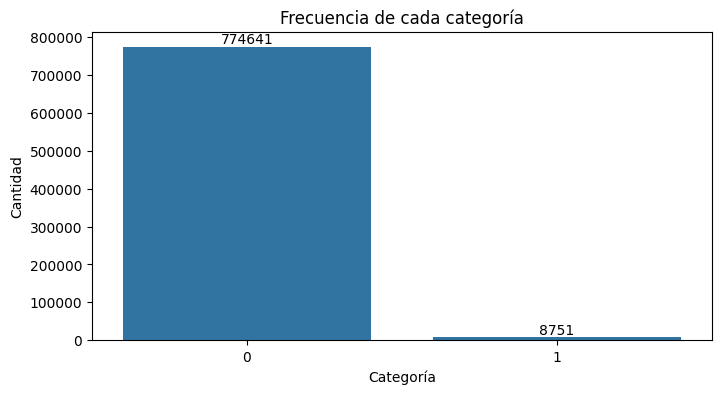

In [8]:
conteo = train_data['fraud_bool'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8,4))
bar_plot = sns.barplot(x=conteo.index, y=conteo.values)

# Agregar las etiquetas sobre las barras
for i, value in enumerate(conteo.values):
    bar_plot.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.xlabel("Categoría", fontsize=10)
plt.ylabel("Cantidad", fontsize=10)
plt.title("Frecuencia de cada categoría", fontsize=12)

plt.show()

## Manejo del desbalanceo de los datos
### SMOTEENN para el balanceo de los datos
El algoritmo SMOTEENN combina dos técnicas de balanceo de clases: SMOTE (Synthetic Minority Over-sampling Technique) y ENN (Edited Nearest Neighbors). Está diseñado para abordar el desequilibrio de clases en conjuntos de datos de clasificación binaria.
Primero aplica SMOTE para generar muestras sintéticas de la clase minoritaria, lo que aumenta su tamaño. Luego aplica ENN para eliminar ejemplos de la clase mayoritaria que están cerca de la frontera de decisión con la clase minoritaria, lo que reduce su tamaño.

In [9]:
from imblearn.combine import SMOTEENN

In [10]:
#División de las caracteristicas y la variable objetivo
X = train_data.drop(columns=[target_var])
y = train_data[target_var]

x_path_train_smoteenn_data = '../../../data/final/x_train_smoteenn_data.csv'
y_path_train_smoteenn_data = '../../../data/final/y_train_smoteenn_data.csv'

if os.path.isfile(x_path_train_smoteenn_data) and os.path.isfile(y_path_train_smoteenn_data):
    X_train = pd.read_csv(x_path_train_smoteenn_data)
    y_train = pd.read_csv(y_path_train_smoteenn_data)
else:
    smote_enn = SMOTEENN(random_state=random_seed, n_jobs=-1)
    X_train, y_train = smote_enn.fit_resample(X, y)
    X_train.to_csv(x_path_train_smoteenn_data,index=False)
    y_train.to_csv(y_path_train_smoteenn_data,index=False)


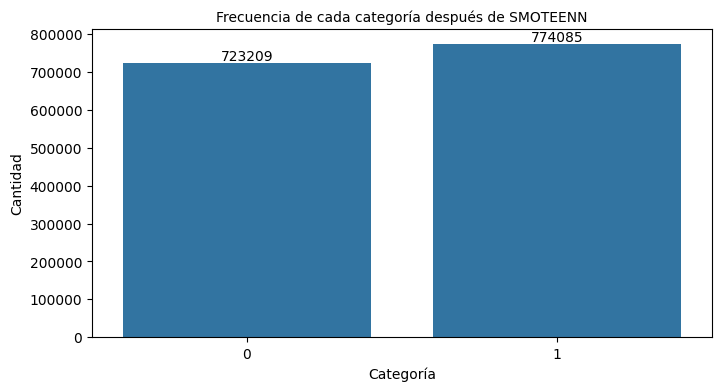

In [11]:
conteo_resampled = y_train.value_counts().sort_index()
conteo_resampled = conteo_resampled.reset_index(drop=True)
plt.figure(figsize=(8,4))
bar_plot_ = sns.barplot(x=conteo_resampled.index, y=conteo_resampled.values)

for i, value in enumerate(conteo_resampled.values):
    bar_plot_.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel("Categoría", fontsize=10)
plt.ylabel("Cantidad", fontsize=10)
plt.title("Frecuencia de cada categoría después de SMOTEENN", fontsize=10)

plt.show()

### Uniform Manifold Approximation and Projection
Es una técnica de reducción de dimensionalidad no lineal, diseñada para preservar la estructura de los datos a medida que reduce el número de características (dimensiones) de un conjunto de datos. UMAP está basado en teorías matemáticas de topología y geometría algebraica y es eficaz para capturar las relaciones locales y globales en los datos.

In [12]:
import umap
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from joblib import Parallel, delayed, dump, load
from sklearn.model_selection import train_test_split

In [13]:
def find_n_components(X_train, y_train, sample_fraction = 0.20,random_seed=42, n_components_range = [3,5,7,9,12]):
    model_etc = ExtraTreesClassifier(random_state=random_seed, n_jobs=-1)

    X_train_sample, _, y_train_sample, _ = train_test_split(
        X_train, y_train, train_size=sample_fraction, random_state=random_seed, stratify=y_train
    )

    def evaluate_umap(n_components):
        umap_reducer = umap.UMAP(n_components=n_components, random_state=random_seed)
        pipeline = make_pipeline(umap_reducer, model_etc)
        pipeline.fit(X_train_sample, y_train_sample)
        y_pred_train = pipeline.predict(X_train_sample)
        f1 = f1_score(y_train_sample, y_pred_train)
        return n_components, f1

    return Parallel(n_jobs=-1)(delayed(evaluate_umap)(n) for n in n_components_range)

def find_best_component(results):
    best_score = -np.inf
    best_n_components = None
    for n_components, train_f1 in results:
        if train_f1 > best_score:
            best_score = train_f1
            best_n_components = n_components
            
    return best_n_components 

In [14]:
x_path_train_smoteenn_dimensional_rd = '../../../data/final/x_train_smoteenn_data_umap.csv'
y_path_train_smoteenn_dimensional_rd = '../../../data/final/y_train_smoteenn_data_umap.csv'
path_model_rd = './umap_model.pkl'

In [ ]:
umap_reducer=None
if os.path.isfile(x_path_train_smoteenn_dimensional_rd) and os.path.isfile(y_path_train_smoteenn_dimensional_rd):
    X_train_umap = pd.read_csv(x_path_train_smoteenn_dimensional_rd)
    y_train_umap= pd.read_csv(y_path_train_smoteenn_dimensional_rd)
    umap_reducer = load(path_model_rd)
else:
    results = find_n_components(X_train, y_train)
    best_n_estimator = find_best_component(results)
    print(results)
    #best_n_estimator = 3
    print(f'El mejor valor de componentes es:{best_n_estimator}')
    umap_reducer = umap.UMAP(n_components=best_n_estimator, random_state=random_seed)
    X_train_rd = umap_reducer.fit_transform(X_train)
    X_train_umap = pd.DataFrame(X_train_rd)
    X_train_umap.to_csv(x_path_train_smoteenn_dimensional_rd,index=False)
    y_train_umap = y_train.copy()
    y_train_umap.to_csv(y_path_train_smoteenn_dimensional_rd,index=False)
    dump(umap_reducer, "umap_model.pkl")

In [16]:
path_results = './results_umap.csv'

if os.path.isfile(path_results):
    df_results = pd.read_csv(path_results)
else:
    df_results = pd.DataFrame(results, columns=["n_components", "f1_score"])
    df_results.to_csv(path_results, index=False)

df_results.sort_values(by="f1_score",ascending=False)

,n_components,f1_score
0,3,1.0
1,5,1.0
2,7,1.0
3,9,1.0
4,12,1.0


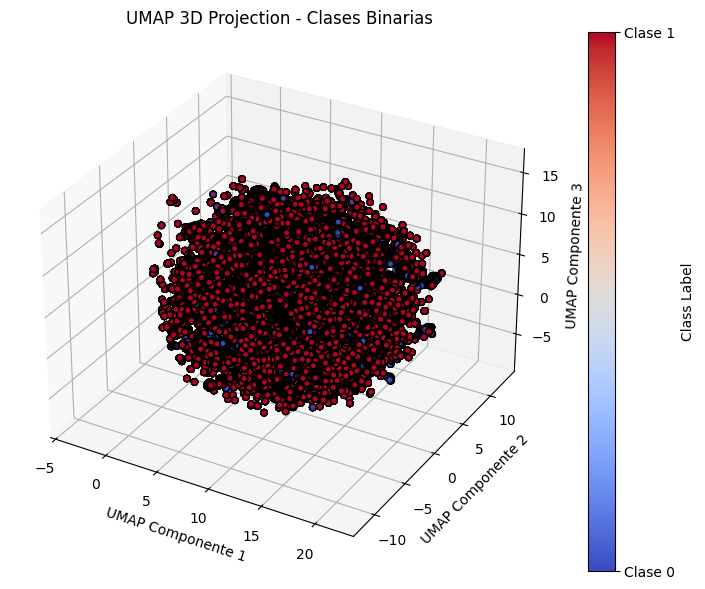

In [17]:
# Crear la figura
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos con colores según la clase
sc = ax.scatter(
    X_train_umap["0"], X_train_umap["1"], X_train_umap["2"], 
    c=y_train[target_var], cmap='coolwarm', edgecolor='k'
)

# Etiquetas de los ejes
ax.set_xlabel("UMAP Componente 1")
ax.set_ylabel("UMAP Componente 2")
ax.set_zlabel("UMAP Componente 3")
ax.set_title("UMAP 3D Projection - Clases Binarias")

# Agregar barra de colores con etiquetas personalizadas
cbar = plt.colorbar(sc, ax=ax, label="Class Label")
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Clase 0", "Clase 1"])

plt.show()

In [18]:
X_test_umap = umap_reducer.transform(X_test)

## Verificación de los modelos
Entrenar modelos sin realizar una optimización de hiperparámetros para 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score
from sklearn.datasets import make_classification
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
import mlflow.xgboost
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score,confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,roc_curve,classification_report
import tensorflow as tf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearnex import patch_sklearn
from sklearn.neighbors import KNeighborsClassifier
import keras
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [20]:
n_iter = 10
tf.random.set_seed(random_seed)
mlflow.set_experiment(experiment_name="Prueba #2 (Reducción de dimensionalidad umap)")

<Experiment: artifact_location='file:///c:/Users/jonat/Desktop/FraudDetectAI/notebooks/modelado/with_dimensional_reduction/mlruns/656376124576794391', creation_time=1742779985301, experiment_id='656376124576794391', last_update_time=1742779985301, lifecycle_stage='active', name='Prueba #2 (Reducción de dimensionalidad umap)', tags={}>

In [42]:
def evaluate_performance(Model, Xtrain, Xtest, Ytrain, Ytest,run_name):
    
    with mlflow.start_run(run_name=run_name):
        
        # Realizar la validación cruzada
        overall_score = cross_val_score(Model, Xtrain, Ytrain, cv=5)
        model_score = np.average(overall_score)
        
        # Hacer predicciones
        Ypredicted = Model.predict(Xtest)
    
        # Calcular las métricas
        training_accuracy = Model.score(Xtrain, Ytrain) * 100
        test_accuracy = accuracy_score(Ytest, Ypredicted) * 100
        precision = np.round(precision_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        recall = np.round(recall_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        f1 = np.round(f1_score(Ytest, Ypredicted, average='weighted') * 100, 2)

        
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_param("model", str(Model))  # Puedes registrar el tipo de modelo
        mlflow.log_metric("training_accuracy", training_accuracy)
        mlflow.log_metric("cross_validation_score", model_score * 100)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Imprimir los resultados
        print("\n • Training Accuracy Score : ", round(training_accuracy, 2))
        print(f" • Cross Validation Score : {round(model_score * 100, 2)}")
        print(f" • Testing Accuracy Score :{round(test_accuracy, 2)}")
        print(f" • Precision Score is : {precision}")
        print(f" • Recall Score is : {recall}")
        print(f" • F1-Score Score is : {f1}")
        if hasattr(Model, "predict_proba"):
            roc_auc = roc_auc_score(Ytest, Model.predict_proba(Xtest)[:, 1])
            mlflow.log_metric("roc_auc", roc_auc)
            print(f' • ROC AUC Score: {roc_auc:.2f}')
        else:
            roc_auc = None

        
        # Registrar el modelo entrenado en MLflow
        mlflow.sklearn.log_model(Model, run_name)

def evaluate_performance_ann(Model, Xtrain, Xtest, Ytrain, Ytest, run_name):
    
    with mlflow.start_run(run_name=run_name):
        Ypredicted_proba = Model.predict(Xtest)
        
        # Binarizar las predicciones (si es necesario)
        Ypredicted = (Ypredicted_proba > 0.5).astype(int)
        
        # Calcular las métricas
        training_accuracy = Model.evaluate(Xtrain, Ytrain, verbose=0)[1] * 100  # Precisión de entrenamiento
        test_accuracy = accuracy_score(Ytest, Ypredicted) * 100  # Precisión de prueba
        precision = np.round(precision_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        recall = np.round(recall_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        f1 = np.round(f1_score(Ytest, Ypredicted, average='weighted') * 100, 2)
        
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_param("model", str(Model))  # Registrar el tipo de modelo
        mlflow.log_metric("training_accuracy", training_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        # Imprimir los resultados
        print("\n • Training Accuracy Score : ", round(training_accuracy, 2))
        print(f" • Testing Accuracy Score :{round(test_accuracy, 2)}")
        print(f" • Precision Score is : {precision}")
        print(f" • Recall Score is : {recall}")
        print(f" • F1-Score Score is : {f1}")
        
        # Calcular el ROC AUC Score usando las probabilidades
        roc_auc = roc_auc_score(Ytest, Ypredicted_proba)  # Usamos las probabilidades para el AUC
        mlflow.log_metric("roc_auc", roc_auc)
        print(f' • ROC AUC Score: {roc_auc:.2f}')
        
        # Registrar el modelo entrenado en MLflow
        mlflow.keras.log_model(Model, run_name)

def display_confusion_matrix(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.show()

def display_confusion_matrix_ann(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.show()

def plot_roc_curve(Model, Xtest, Ytest):
    if hasattr(Model, "predict_proba"):  # Verificar si el modelo tiene predict_proba
        Yscores = Model.predict_proba(Xtest)[:, 1]  # Probabilidad de clase positiva
    else:
        print("El modelo no tiene `predict_proba`. No se puede graficar la curva ROC.")
        return

    # Calcular AUC y curva ROC
    roc_auc = roc_auc_score(Ytest, Yscores)
    fpr, tpr, thresholds = roc_curve(Ytest, Yscores)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_roc_curve_ann(Model, Xtest, Ytest):
    # Si el modelo devuelve una sola probabilidad para la clase positiva
    Yscores = Model.predict(Xtest)  # No es necesario usar [:, 1] si solo hay una columna

    # Calcular AUC y curva ROC
    roc_auc = roc_auc_score(Ytest, Yscores)
    fpr, tpr, thresholds = roc_curve(Ytest, Yscores)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Regresión logistica

**Descripción:**
La regresión logística es un algoritmo de clasificación binaria que modela la probabilidad de que una instancia pertenezca a una clase particular. Utiliza la función sigmoide para transformar una combinación lineal de las características en una probabilidad.

**Funcionamiento:**
- La función sigmoide se aplica a la combinación lineal de las características.
- El resultado de la función sigmoide es una probabilidad entre 0 y 1.
- Se clasifica la instancia en una clase u otra dependiendo de un umbral, usualmente 0.5.

**Ventajas:**
- Fácil de interpretar y de implementar.
- Rápido y eficiente con grandes conjuntos de datos.
- Proporciona probabilidades como salida, lo cual es útil para la toma de decisiones basada en riesgo.

**Desventajas:**
- No maneja bien relaciones no lineales.
- Sensible a outliers (valores atípicos). 

In [22]:
model_lr = LogisticRegression() 
model_lr.fit(X_train_umap, y_train_umap)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='deprecated', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluación del modelo con los datos de prueba

              precision    recall  f1-score   support

           0       0.99      0.49      0.66    193660
           1       0.01      0.65      0.03      2188

    accuracy                           0.49    195848
   macro avg       0.50      0.57      0.34    195848
weighted avg       0.98      0.49      0.65    195848



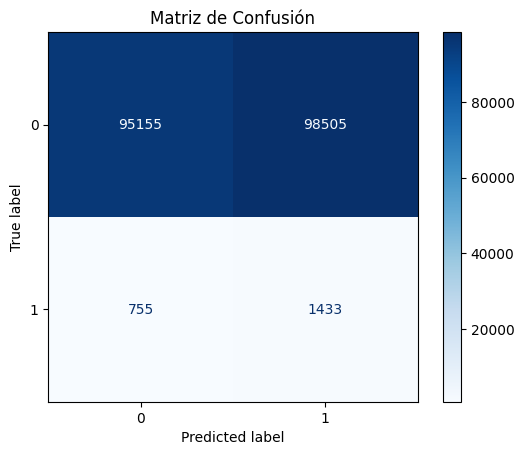

In [23]:
display_confusion_matrix(model_lr,X_test_umap,y_test)

In [24]:
evaluate_performance(model_lr, X_train_umap, X_test_umap, y_train_umap, y_test,'Logistic Regresion')


 • Training Accuracy Score :  57.96
 • Cross Validation Score : 57.97
 • Testing Accuracy Score :49.32
 • Precision Score is : 98.12
 • Recall Score is : 49.32
 • F1-Score Score is : 65.02
 • ROC AUC Score: 0.58


2025/03/23 21:20:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


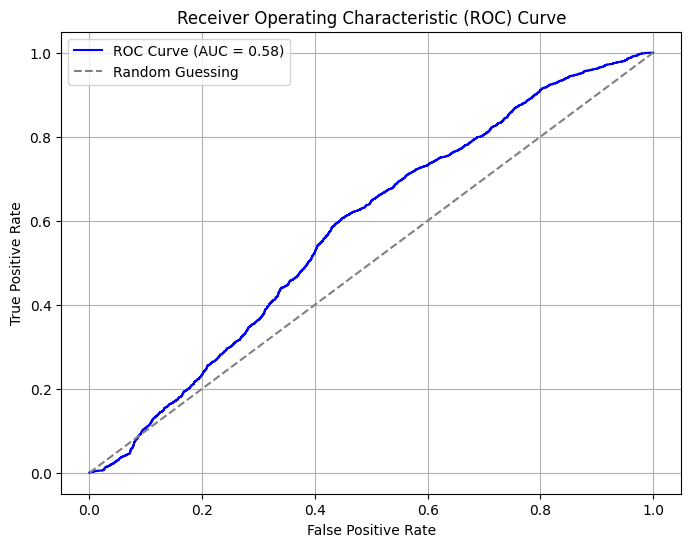

In [25]:
plot_roc_curve(model_lr, X_test_umap, y_test)

##### Random Forest

**Descripción:**
Los árboles de decisión son modelos basados en reglas que dividen iterativamente el espacio de características en subconjuntos más pequeños, creando una estructura similar a un árbol. Cada nodo interno representa una prueba sobre una característica, cada rama representa el resultado de la prueba, y cada hoja representa una clase.

**Funcionamiento:**
- Se selecciona la característica que mejor divide los datos (mediante criterios como la ganancia de información, el índice de Gini, etc.).
- Se crean ramas para cada posible valor o rango de la característica.
- El proceso se repite recursivamente para cada subconjunto resultante hasta que se alcance un criterio de parada (como una profundidad máxima o un número mínimo de muestras en una hoja).

**Ventajas:**
- Fácil de interpretar y visualizar.
- No requiere preprocesamiento de los datos (como la normalización o escalado de características).
- Puede manejar características categóricas y numéricas.

**Desventajas:**
- Propenso al sobreajuste (overfitting) si no se poda adecuadamente.
- Sensible a pequeñas variaciones en los datos (alta varianza).
- No es tan eficiente en términos de precisión como otros modelos más complejos.

In [26]:
model_rf = RandomForestClassifier(random_state=random_seed,n_jobs=-1)
model_rf.fit(X_train_umap, y_train_umap)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Evaluación del modelo con los datos de prueba

              precision    recall  f1-score   support

           0       0.99      0.83      0.90    193660
           1       0.03      0.54      0.06      2188

    accuracy                           0.82    195848
   macro avg       0.51      0.68      0.48    195848
weighted avg       0.98      0.82      0.89    195848



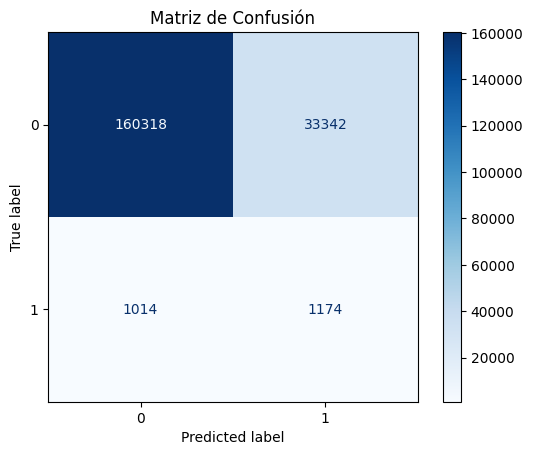

In [27]:
display_confusion_matrix(model_rf,X_test_umap,y_test)

In [28]:
evaluate_performance(model_rf, X_train_umap, X_test_umap, y_train_umap, y_test,'Random Forest')


 • Training Accuracy Score :  100.0
 • Cross Validation Score : 96.15
 • Testing Accuracy Score :82.46
 • Precision Score is : 98.3
 • Recall Score is : 82.46
 • F1-Score Score is : 89.38
 • ROC AUC Score: 0.76


2025/03/23 21:25:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


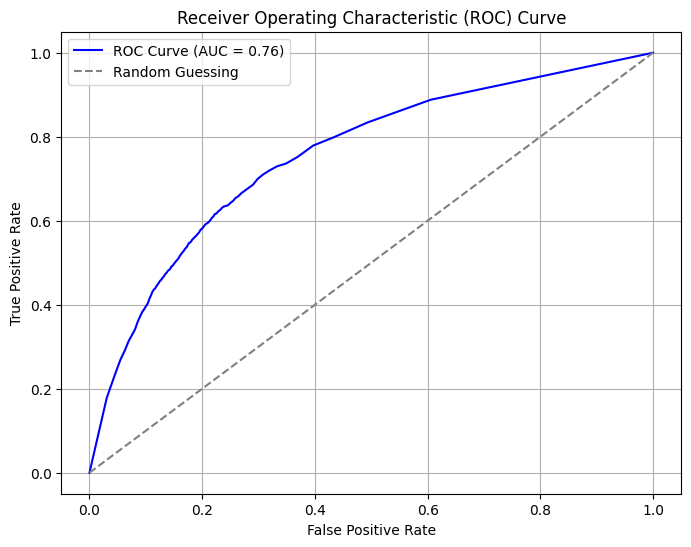

In [29]:
plot_roc_curve(model_rf, X_test_umap, y_test)

##### K-Nearest Neighbors (K-NN)

**Descripción:**
K-Nearest Neighbors (K-NN) es un algoritmo de clasificación (y regresión) que asigna una clase o valor a un punto de datos en función de la mayoría de sus k vecinos más cercanos en el espacio de características. Este algoritmo no requiere un modelo explícito, es decir, es un algoritmo basado en instancias.

**Funcionamiento:**
- Cálculo de distancia: Para un nuevo punto, se calcula la distancia a todos los puntos del conjunto de entrenamiento (usualmente se usa la distancia Euclidiana).
- Selección de los k vecinos más cercanos: Se elige el valor de k (número de vecinos) y se seleccionan los k puntos más cercanos.
- Asignación de clase: Para clasificación, el punto se clasifica según la clase más frecuente entre sus k vecinos. Para regresión, se promedia el valor de los k vecinos.
Ventajas

**Ventajas:**
- Simplicidad: Es fácil de entender e implementar.
- No asume una forma de distribución: No realiza suposiciones sobre los datos (no requiere que los datos sean lineales ni de ninguna forma particular).
- Funciona bien con datos no lineales: No necesita un modelo previo, se adapta fácilmente a datos con decisiones complejas.

**Desventajas:**
- Computacionalmente costoso: Puede ser lento en datasets grandes, ya que calcula la distancia de cada punto con todos los demás puntos.
- Sensibilidad a la escala: Requiere que las características estén escaladas, ya que la distancia entre puntos depende de las características.
- Elección de k: La selección de un k adecuado es crítica, y valores muy pequeños o grandes pueden afectar el rendimiento.

In [30]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_umap, y_train_umap)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Evaluación del modelo con los datos de prueba

              precision    recall  f1-score   support

           0       0.99      0.81      0.89    193660
           1       0.03      0.55      0.06      2188

    accuracy                           0.81    195848
   macro avg       0.51      0.68      0.48    195848
weighted avg       0.98      0.81      0.88    195848



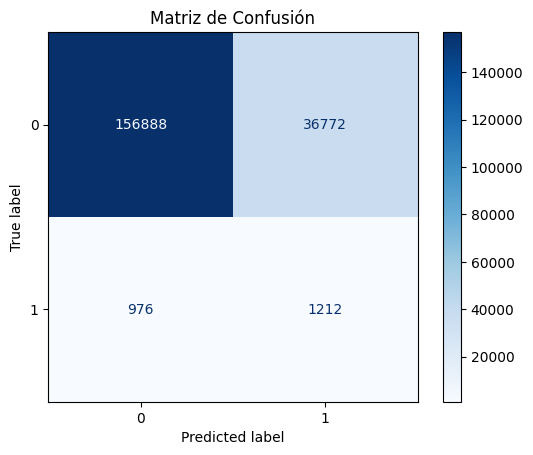

In [31]:
display_confusion_matrix(model_knn,X_test_umap,y_test)

In [32]:
evaluate_performance(model_knn, X_train_umap, X_test_umap, y_train_umap, y_test,'K-Nearest Neighbors')


 • Training Accuracy Score :  97.24
 • Cross Validation Score : 95.94
 • Testing Accuracy Score :80.73
 • Precision Score is : 98.31
 • Recall Score is : 80.73
 • F1-Score Score is : 88.33
 • ROC AUC Score: 0.71


2025/03/23 21:28:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


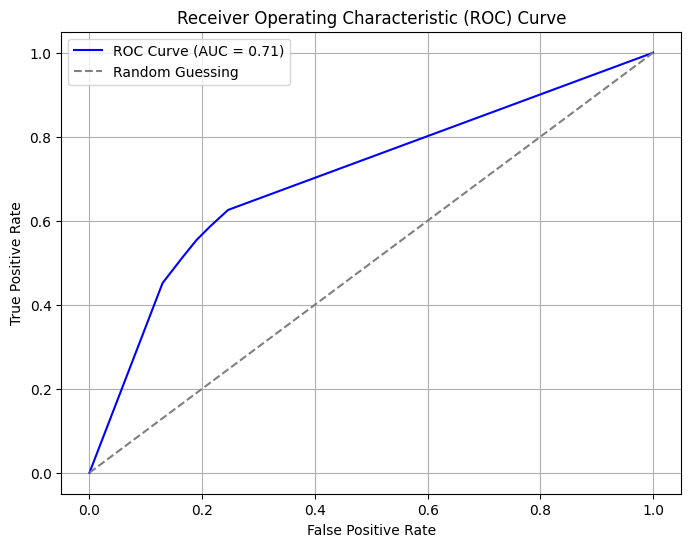

In [33]:
plot_roc_curve(model_knn, X_test_umap, y_test)

##### XGBoost

**Descripción:**
XGBoost es un algoritmo de boosting basado en árboles de decisión que mejora la precisión combinando árboles de manera secuencial, corrigiendo los errores de los árboles anteriores. Es conocido por su alto rendimiento y eficiencia.

**Funcionamiento:**
- Boosting: Los árboles se construyen de manera secuencial, corrigiendo los errores de los anteriores.
- Optimización: Minimiza la función de pérdida mediante descenso de gradiente.
- Regularización: Ayuda a evitar el sobreajuste.
- Entrenamiento paralelo: Mejora la eficiencia en el entrenamiento.

**Ventajas:**
- Alto rendimiento y precisión.
- Maneja bien datos desbalanceados.
- Regularización para evitar el sobreajuste.
- Escala bien con grandes datasets.

**Desventajas:**
- Configuración compleja (muchos hiperparámetros).
- Tiempo de entrenamiento largo en grandes datasets.
- Difícil de interpretar.

In [34]:
xgb_model = XGBClassifier(random_state=random_seed, use_label_encoder=False,njobs=-1)
xgb_model.fit(X_train_umap, y_train_umap)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, njobs=-1, ...)

#### Evaluación del modelo con los datos de prueba

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    193660
           1       0.03      0.68      0.07      2188

    accuracy                           0.78    195848
   macro avg       0.51      0.73      0.47    195848
weighted avg       0.98      0.78      0.87    195848



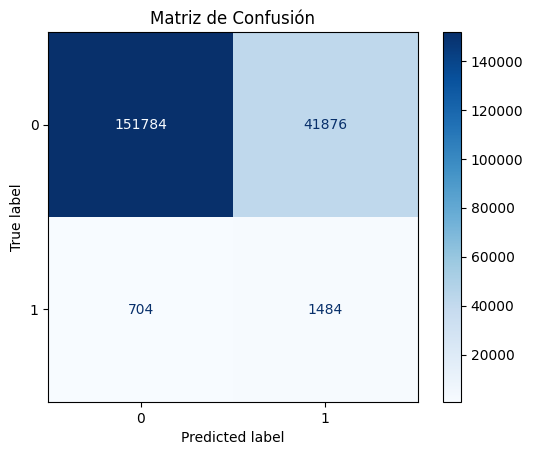

In [35]:
display_confusion_matrix(xgb_model,X_test_umap,y_test)

In [36]:
evaluate_performance(xgb_model, X_train_umap, X_test_umap, y_train_umap, y_test,'XGBClassifier')


 • Training Accuracy Score :  87.05
 • Cross Validation Score : 87.18
 • Testing Accuracy Score :78.26
 • Precision Score is : 98.46
 • Recall Score is : 78.26
 • F1-Score Score is : 86.79
 • ROC AUC Score: 0.79


2025/03/23 21:28:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


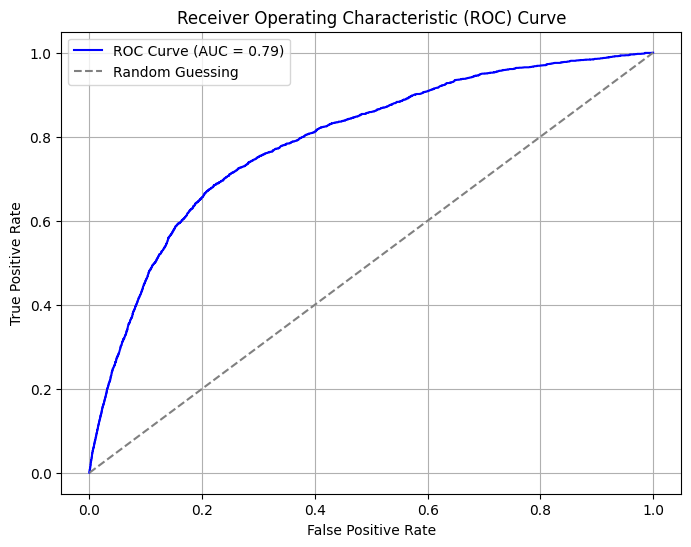

In [37]:
plot_roc_curve(xgb_model, X_test_umap, y_test)

##### Redes Neuronales Artificiales (ANN)

**Descripción:**
Las Redes Neuronales Artificiales (ANN) son modelos inspirados en el cerebro humano, compuestos por capas de neuronas que procesan datos para realizar tareas como clasificación, regresión y reconocimiento de patrones.

**Funcionamiento:**
- Estructura: Tres capas principales: entrada, ocultas y salida.
- Entrenamiento: Ajusta pesos utilizando el algoritmo de retropropagación y descenso de gradiente.
- Predicción: Los datos pasan por las capas y se obtiene la salida.

**Ventajas:**
- Capaz de aprender patrones complejos.
- Flexible y aplicable a diversos problemas.
- Mejora con más datos.

**Desventajas:**
- Requiere grandes cantidades de datos.
- Alto costo computacional.
- Difícil de interpretar (caja negra).

In [38]:
model_ann = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(3,)),  # Capa oculta 1 con 64 neuronas
    keras.layers.Dense(32, activation="relu"),  # Capa oculta 2 con 32 neuronas
    keras.layers.Dense(16, activation="relu"),  # Capa oculta 3 con 16 neuronas
    keras.layers.Dense(1, activation="sigmoid")  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model_ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model_ann.fit(X_train_umap, y_train_umap, epochs=50, batch_size=32, validation_data=(X_test_umap, y_test))

Epoch 1/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.6988 - loss: 0.5776 - val_accuracy: 0.7515 - val_loss: 0.5694
Epoch 2/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.7637 - loss: 0.4923 - val_accuracy: 0.7434 - val_loss: 0.5595
Epoch 3/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.7815 - loss: 0.4637 - val_accuracy: 0.7737 - val_loss: 0.5461
Epoch 4/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.7934 - loss: 0.4460 - val_accuracy: 0.7841 - val_loss: 0.5395
Epoch 5/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.8003 - loss: 0.4351 - val_accuracy: 0.7813 - val_loss: 0.5511
Epoch 6/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.8054 - loss: 0.4267 - val_accuracy: 0.7805 - val_loss: 0.5619
Epoch 7/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - accuracy: 0.8096 - loss: 0.4203 - val_accuracy: 0.7788 - val_loss: 0.5610
Epoch 8/50
46791/46791 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - accuracy: 

#### Evaluación del modelo con los datos de prueba


6121/6121 ━━━━━━━━━━━━━━━━━━━━ 3s 525us/step
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    193660
           1       0.03      0.62      0.06      2188

    accuracy                           0.80    195848
   macro avg       0.51      0.71      0.47    195848
weighted avg       0.98      0.80      0.88    195848



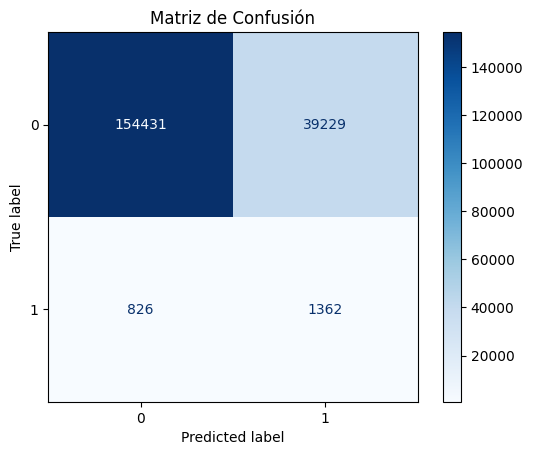

In [39]:
display_confusion_matrix_ann(model_ann,X_test_umap,y_test)

In [40]:
evaluate_performance_ann(model_ann, X_train_umap, X_test_umap, y_train_umap, y_test,'Red Neuronal')

6121/6121 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step


2025/03/23 22:12:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.



 • Training Accuracy Score :  84.78
 • Testing Accuracy Score :79.55
 • Precision Score is : 98.39
 • Recall Score is : 79.55
 • F1-Score Score is : 87.6
 • ROC AUC Score: 0.78


2025/03/23 22:12:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


6121/6121 ━━━━━━━━━━━━━━━━━━━━ 4s 638us/step


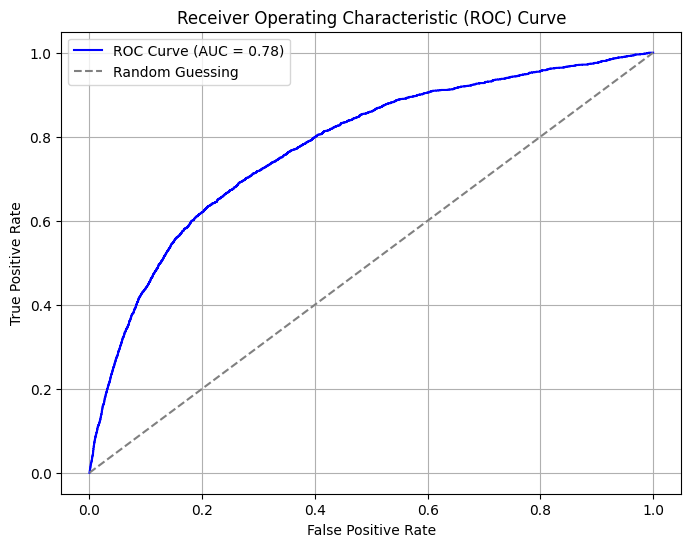

In [43]:
plot_roc_curve_ann(model_ann, X_test_umap, y_test)